# Linear regression using Scikit-learn

Look at the Estimator API of scikit-learn. Every ML algorithm in scikit-learn is implemented via the Estimator API.

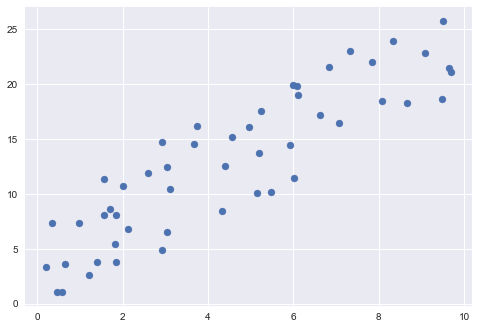

In [29]:
%matplotlib inline
import seaborn as sns; sns.set()

import matplotlib.pyplot as plt
import numpy as np

# Generate some data
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
variance = 10
slope = 2
intercept = -1

y = slope * x + intercept + variance * rng.rand(50)
plt.scatter(x,y)


In [30]:
# Instantiate the LinearRegression class, passing the hyperparameters
# fit_intercept=True is selected to tell we like to fit the y-parameter
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
print("Model:", model)

# Arrange the data in a feature matrix and target vector. x needs to be reshaped in a matrix, y is ok
X = x.reshape((50,1))
print("Shape before: %s, shape after: %s" % (x.shape, X.shape))

# Apply the model to data
model.fit(X,y)

# The results of the fitting are stored in in parameters with trailing underscores
print("Coef:", model.coef_)
print("Intercept:", model.intercept_)
print("Rank:", model.rank_)
print("Singular:", model.singular_)


Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
Shape before: (50,), shape after: (50, 1)
Coef: [ 2.06607665]
Intercept: 3.6497242492
Rank: 1
Singular: [ 20.22182407]


Scikit-learn does not draw conclusions from the model parameters. 
Interpreting model parameters is much more a 'statistical modeling' than 'machine learning' question.
For statistical modeling you can look at Python's statsmodels package

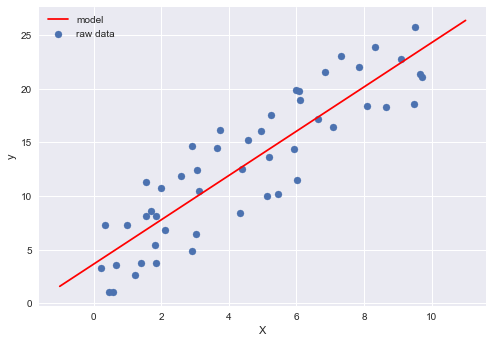

In [31]:
""" Visualise the model fitting """

# Predict labels of unknown data (first we need to generate new data).
# The fitted model is actually the prediction for new unknown samples

x_fit = np.linspace(-1,11)
X_fit = x_fit[:, np.newaxis]  # reshape as earlier
y_fit = model.predict(X_fit)

# Visualise the raw data and the model fit
plt.scatter(X, y, label='raw data')
plt.xlabel("X")
plt.ylabel("y")
plt.plot(X_fit, y_fit, label='model', color='red')
plt.legend()

In [32]:
""" Evaluate the fitting """

# Generate new random data with the same parameters for slope, intercept and variance
rng = np.random.RandomState(43)
x_test = 10 * rng.rand(50)
y_test = slope * x_test + intercept + variance * rng.rand(50)
X_test = x_test[:, np.newaxis]  # reshape as earlier

# A 'score' measure: 
# 1 is a perfect relationship, and 0 means there is no linear relationship between X_test and y_test
print("Score:", model.score(X_test, y_test))
y_predict = model.predict(X_test)
mse = np.mean(((y_predict - y_test) ** 2) / len(y_test))
print("Mean sqared error: {0:.5f}".format(mse))

Score: 0.836482320231
Mean sqared error: 0.14984


# Polynomial fitting

In this part we'll fit a higher degree polynomial to more complex data.

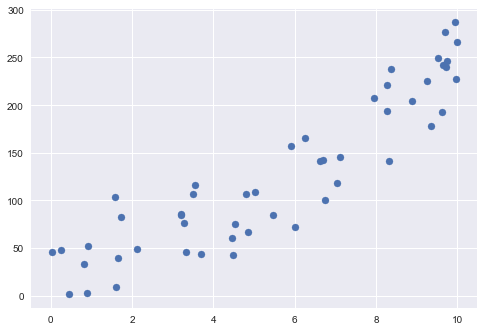

In [37]:
# Generate some random data as earlier, and visualise the data
x = 10 * rng.rand(50)
variance = 100
y = slope * x ** 2 + intercept + variance * rng.rand(50)
plt.scatter(x,y)

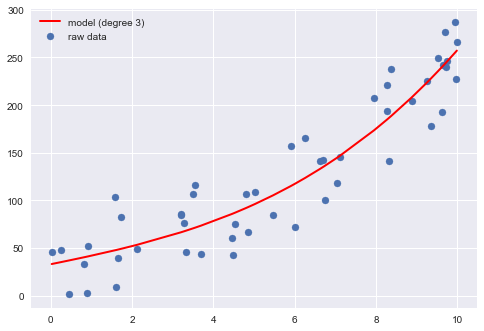

In [43]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

X = x[:, np.newaxis]
degree = 3
model2 = make_pipeline(PolynomialFeatures(degree=degree), Ridge())
model2.fit(X, y)
y_plot = model2.predict(X)
plt.scatter(X,y, label='raw data')
X = sorted(X)
y_plot = sorted(y_plot)
plt.plot(X, y_plot, color='red', linewidth=2, label="model (degree %d)" % degree)
plt.legend()